In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

# from google.colab import drive
# drive.mount("/content/drive", force_remount=True)

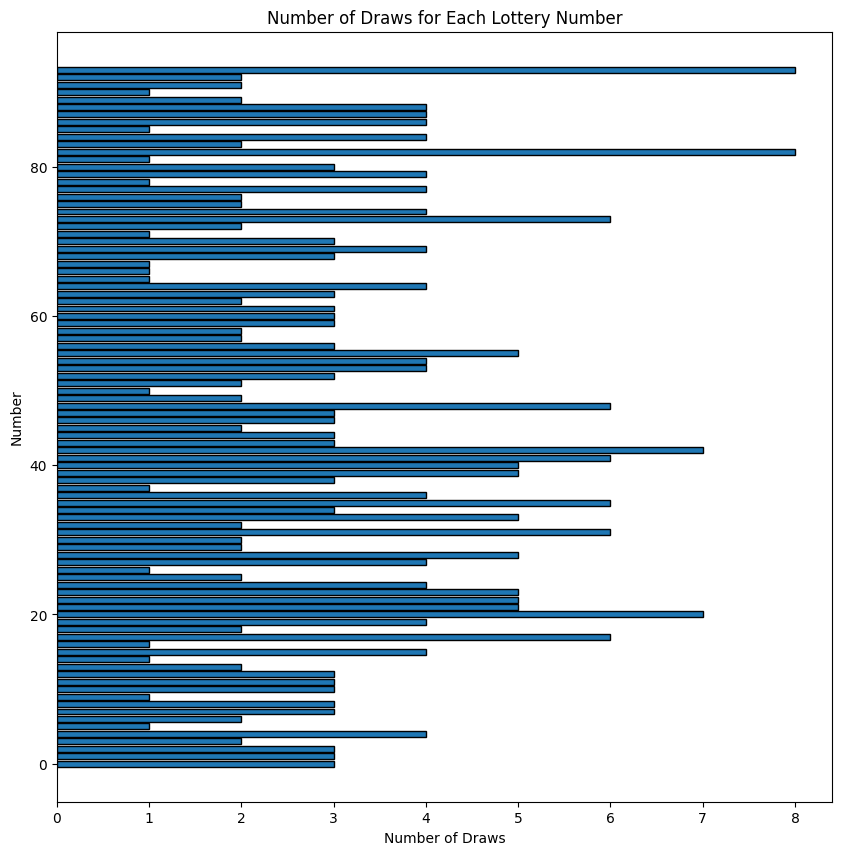

In [10]:
# ---
# Group No. 10
#1. นางสาวณัฐชา บุญเฉย 6410450435
#2. นางสาวอิงกมล ขาวกมล 6410450656
#3. นางสาวชลดา บำรุงรส 6410450401
#4. นายณรงค์เดช สำเร็จประสงค์ 6410450427
# ---

group = 10 # กลุ่มที่

problem = 7 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".txt"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path, header=None)

# --- เริ่มเขียนโค้ดตรงนี้ ---

data3={'LottoDate':[],  'LottoNo':[]}

df = pd.DataFrame(data3)

j = 0

LottoDate=""
LottoNo=""

for i in range(len(data)):
  if j==0:
      LottoDate = data.iloc[i,0]
      j=j+1
  else:
      LottoNo = data.iloc[i,0]
      j=0
      new_row = {'LottoDate':LottoDate,  'LottoNo':int(LottoNo)}
      df.loc[len(df)] = new_row

df = df.groupby("LottoNo").agg(lottono_count=('LottoNo','count'))

data = df.reset_index()

data= data.rename(columns={"LottoNo": "Number","lottono_count":"DrawCount"})

data4=df

plt = reload(plt)
plt.figure(figsize=(10,10))


plt.barh(range(len(data4['lottono_count'])), data4['lottono_count'], edgecolor='black',)


plt.xlabel('Number of Draws')
plt.ylabel('Number')

plt.title('Number of Draws for Each Lottery Number')


# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()